In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import json
import time

#We use the same datasets for every project so I don't think it would be a bad idea to make a metadata file. 
#I've created an example of a potential schema with the abalone set

with open("MLAlgorithms/Datasets/metadata.json",'r') as f:
    metadata = json.loads(f.read())

df = pd.read_csv("MLAlgorithms/Datasets/" + metadata["breastCancer"]["dataPath"], names=metadata["breastCancer"]["attributes"], na_values=metadata["breastCancer"]["NAValues"])
df = df.dropna()
#Shuffling the dataset can be accomplished by taking a random sample of the whole thing without replacement
#Set a random state so results are repeatable
df = df.sample(frac=1, random_state=420)

tqdm.pandas(desc="Brrrrr")

In [31]:
#Pandas has a really neat apply feature that lets us do bulk processing on c style (numpy) arrays. Iterrows is another method to process an array and I will say that iterrows combined with poor time management result in some sorry sap dropping classes...
#I take it a step further and use progress_apply (provided by tqdm) to give me a progress bar because it keeps me sane

def apply_test(row, slow_factor=0):
    time.sleep(slow_factor) #Go slow to show off progress goodness
    return row[0]

In [26]:
#It's being cranky and messing with my meme format, but you get the idea
print("Progress bar go")

sf = (1.0/len(abalone)) * 10 #make it last ~10 seconds (time.sleep isn't super accurate but its got the spirit)

first = abalone.progress_apply(apply_test, axis=1, raw=True, args = (sf,))

#This isn't a good example at all, but first will contain all of the values in the first column of the dataframe

Brrrrr: 100%|██████████| 4177/4177 [00:12<00:00, 332.31it/s]


In [40]:
#Pandas assigns a unique index to each row. Notice how the index column is all randomized
#That's super useful for doing things like merging dataframes
abalone

,sex,length,diamter,height,whole,shucked,viscera,shell,rings
190,M,0.615,0.480,0.180,1.1595,0.4845,0.2165,0.3250,13
4102,M,0.680,0.545,0.185,1.6720,0.7075,0.3640,0.4800,11
1293,I,0.520,0.400,0.130,0.5825,0.2330,0.1365,0.1800,10
1800,M,0.605,0.475,0.175,1.2525,0.5575,0.3055,0.3430,9
1167,M,0.620,0.470,0.135,1.0195,0.5315,0.2005,0.2475,8
...,...,...,...,...,...,...,...,...,...
266,M,0.520,0.450,0.150,0.8950,0.3615,0.1860,0.2350,14
2202,M,0.570,0.405,0.160,0.9245,0.3445,0.2185,0.2950,19
1209,F,0.780,0.630,0.215,2.6570,1.4880,0.4985,0.5860,11
2675,M,0.600,0.490,0.210,1.9875,1.0050,0.4190,0.4910,10


In [41]:


#Pandas has two functions select a single row
# iloc will grab the row at specific row number while loc will grab it at a specific index

#In this case

print(abalone.iloc[0])
print(abalone.loc[190])

#Are the same

sex             M
length      0.615
diamter      0.48
height       0.18
whole      1.1595
shucked    0.4845
viscera    0.2165
shell       0.325
rings          13
Name: 190, dtype: object
sex             M
length      0.615
diamter      0.48
height       0.18
whole      1.1595
shucked    0.4845
viscera    0.2165
shell       0.325
rings          13
Name: 190, dtype: object


In [42]:
#I like to reset the index after I shuffle because I consider the shuffled dataframe the starting one
abalone = abalone.reset_index(drop=True) #drop=True means don't add the old index as a column
abalone

,sex,length,diamter,height,whole,shucked,viscera,shell,rings
0,M,0.615,0.480,0.180,1.1595,0.4845,0.2165,0.3250,13
1,M,0.680,0.545,0.185,1.6720,0.7075,0.3640,0.4800,11
2,I,0.520,0.400,0.130,0.5825,0.2330,0.1365,0.1800,10
3,M,0.605,0.475,0.175,1.2525,0.5575,0.3055,0.3430,9
4,M,0.620,0.470,0.135,1.0195,0.5315,0.2005,0.2475,8
...,...,...,...,...,...,...,...,...,...
4172,M,0.520,0.450,0.150,0.8950,0.3615,0.1860,0.2350,14
4173,M,0.570,0.405,0.160,0.9245,0.3445,0.2185,0.2950,19
4174,F,0.780,0.630,0.215,2.6570,1.4880,0.4985,0.5860,11
4175,M,0.600,0.490,0.210,1.9875,1.0050,0.4190,0.4910,10


In [49]:
#We're going to want to normalize our dataset before we use it otherwise larger units tend to dominate the results
#One way to normalize is to calculate a Z-Score for each value. This works really well assuming that the data is normally distributed

#One of the columns in the dataset isn't numeric, so I will only include the numeric columns in this example
numeric_cols = metadata["abalone"]["names"][:] #Deep copy because lists are pointers in python. Otherwise this cell will break if run twice
numeric_cols.remove("sex")


normed_abalone = (abalone[numeric_cols] - abalone[numeric_cols].mean())/abalone[numeric_cols].std()
normed_abalone

,length,diamter,height,whole,shucked,viscera,shell,rings
190,0.757812,0.726711,0.967881,0.674481,0.563754,0.327570,0.619019,0.951041
4102,1.299060,1.381690,1.087421,1.719569,1.568426,1.673198,1.732504,0.330726
1293,-0.033242,-0.079416,-0.227518,-0.502136,-0.569318,-0.402262,-0.422627,0.020568
1800,0.674544,0.676328,0.848341,0.864126,0.892638,1.139509,0.748327,-0.289589
1167,0.799447,0.625945,-0.107978,0.388993,0.775501,0.181604,0.062277,-0.599747
...,...,...,...,...,...,...,...,...
266,-0.033242,0.424414,0.250642,0.135113,0.009608,0.049322,-0.027520,1.261198
2202,0.383103,-0.029033,0.489721,0.195269,-0.066982,0.345816,0.403506,2.811985
1209,2.131749,2.238201,1.804660,3.728179,5.084779,2.900229,2.493983,0.330726
2675,0.632909,0.827477,1.685120,2.362936,2.908740,2.174958,1.811525,0.020568


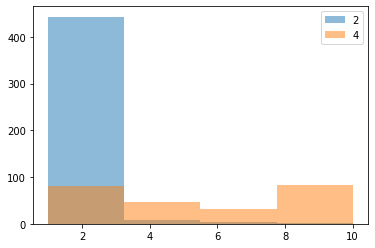

array([4, 2])

In [42]:
#Pandas Dataframes are essentially a dictionary of numpy arrays. The key is the column name
#This means we can toss a pandas column anywhere that takes a numpy array
test_col = "marginalAdhesion"
bins = np.histogram_bin_edges(df[test_col], bins=4)
plt.hist(df[df["class"]==2][test_col], bins=bins, alpha=0.5, label="2")
plt.hist(df[df["class"]==4][test_col], bins=bins, alpha=0.5, label="4")
plt.legend()
plt.show()
df["class"].unique()
# plt.violinplot(abalone["rings"])
# plt.scatter(abalone["length"], abalone["rings"])

# Example Discritzer Use

In [2]:
from MLAlgorithms.Utils.BinDiscretizer import BinDiscretizer
import math


train = df.iloc[:math.floor(0.1*len(df))]
test = df.iloc[math.floor(0.1*len(df)):]

bd = BinDiscretizer(train["marginalAdhesion"], bins=8)
discrete = bd.train_fit()

test_discrete = bd.fit(test["marginalAdhesion"])

plt.hist(discrete, alpha=0.5, label="Test", density=True) #Density scales the histogram so that the area sums to 1
plt.hist(test_discrete, alpha=0.5, label="Train", density=True)
plt.legend()
plt.show()

UntrainedUtilityError: A BinDiscritzer utility is trying to fit data without being trained

# Applying the Discritizer to several columns. 

This is just potential method

In [17]:
multi_bd = BinDiscretizer(train[metadata["breastCancer"]["continuous"]], multi=True, bins=8)

multi_bd.train_multi()
multi_disc = multi_bd.fit_multi(test[metadata["breastCancer"]["continuous"]])
# test[metadata["breastCancer"]["continuous"]]

In [14]:
len(multi_disc["normalNucleoli"].unique())

9

In [18]:
test[metadata["breastCancer"]["continuous"]].dtypes

clumpThickness                int64
uniformityOfCellSize          int64
uniformityOfCellShape         int64
marginalAdhesion              int64
singleEpithelialCellSize      int64
bareNuclei                  float64
blandChromatin                int64
normalNucleoli                int64
mitoses                       int64
class                         int64
dtype: object

In [19]:
train["bareNuclei"].unique()

array([ 1.,  4., 10.,  5.,  2.,  3.,  8.,  9.])

In [8]:
import os
os.getcwd()

'/mnt/c/Users/Andrew/School/CSCI 447/CSCI-447'

In [11]:
!pip3 install -e .

Obtaining file:///mnt/c/Users/Andrew/School/CSCI%20447/CSCI-447
  Attempting uninstall: MLAlgorithms
    Found existing installation: MLAlgorithms 1.0
    Uninstalling MLAlgorithms-1.0:
      Successfully uninstalled MLAlgorithms-1.0
  Running setup.py develop for MLAlgorithms
